In [1]:
!pwd
!ls -al

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_orig = pd.read_csv('AmesHousing.csv')
df_orig.drop(['PID', 'Order'], axis=1, inplace=True)
df_orig.head()


/Users/manusokane/Desktop/University/UU Computer Science/COM747 - Data Science & Machine Learning/ML_HousePriceAssignment
total 8432
drwxr-xr-x   6 manusokane  staff      192 Apr  3 21:14 .
drwxr-xr-x@  7 manusokane  staff      224 Apr  3 20:32 ..
drwxr-xr-x  14 manusokane  staff      448 Apr  7 21:14 .git
-rw-r--r--@  1 manusokane  staff   963738 Apr  3 21:14 AmesHousing.csv
-rw-r--r--   1 manusokane  staff  3345801 Apr  7 21:14 ML_HousePriceNotebook.ipynb
-rw-r--r--   1 manusokane  staff       31 Apr  3 20:36 README.md


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Data Analysis

Understand what type of features we have in our data
Check if any columns contain null values

In [2]:
numeric_features = df_orig.select_dtypes(include=['int', 'float'])
categorical_features = df_orig.select_dtypes(include=['object'])

print(f"Numeric features: {len(numeric_features.columns)}")
print(f"Numeric features: {numeric_features.columns}\n")
print(f"Categorical features: {len(categorical_features.columns)}")
print(f"Categorical features: {categorical_features.columns}\n\n")

Numeric features: 37
Numeric features: Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

Categorical features: 43
Categorical features: Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 

In [3]:
# Check for missing values
total_columns_with_missing_values = df_orig.isnull().any().sum()
print(f"Total number of columns with missing values: {total_columns_with_missing_values}\n")

# Check for missing values in numeric features
missing_numeric = numeric_features.columns[numeric_features.isnull().any()]
missing_numeric = missing_numeric.sort_values(ascending=False)
print(f"Missing values in numeric features: {missing_numeric}\n")

# Check for missing values in categorical features
missing_categorical = categorical_features.columns[categorical_features.isnull().any()]
missing_categorical = missing_categorical.sort_values(ascending=False)
print(f"Missing values in categorical features: {missing_categorical}\n")



Total number of columns with missing values: 27

Missing values in numeric features: Index(['Total Bsmt SF', 'Mas Vnr Area', 'Lot Frontage', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'BsmtFin SF 2', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Bsmt Half Bath', 'Bsmt Full Bath'],
      dtype='object')

Missing values in categorical features: Index(['Pool QC', 'Misc Feature', 'Mas Vnr Type', 'Garage Type', 'Garage Qual',
       'Garage Finish', 'Garage Cond', 'Fireplace Qu', 'Fence', 'Electrical',
       'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Exposure',
       'Bsmt Cond', 'Alley'],
      dtype='object')



# Data Cleaning

What to do with missing values?
Encoding?

Graph showing NaN values below


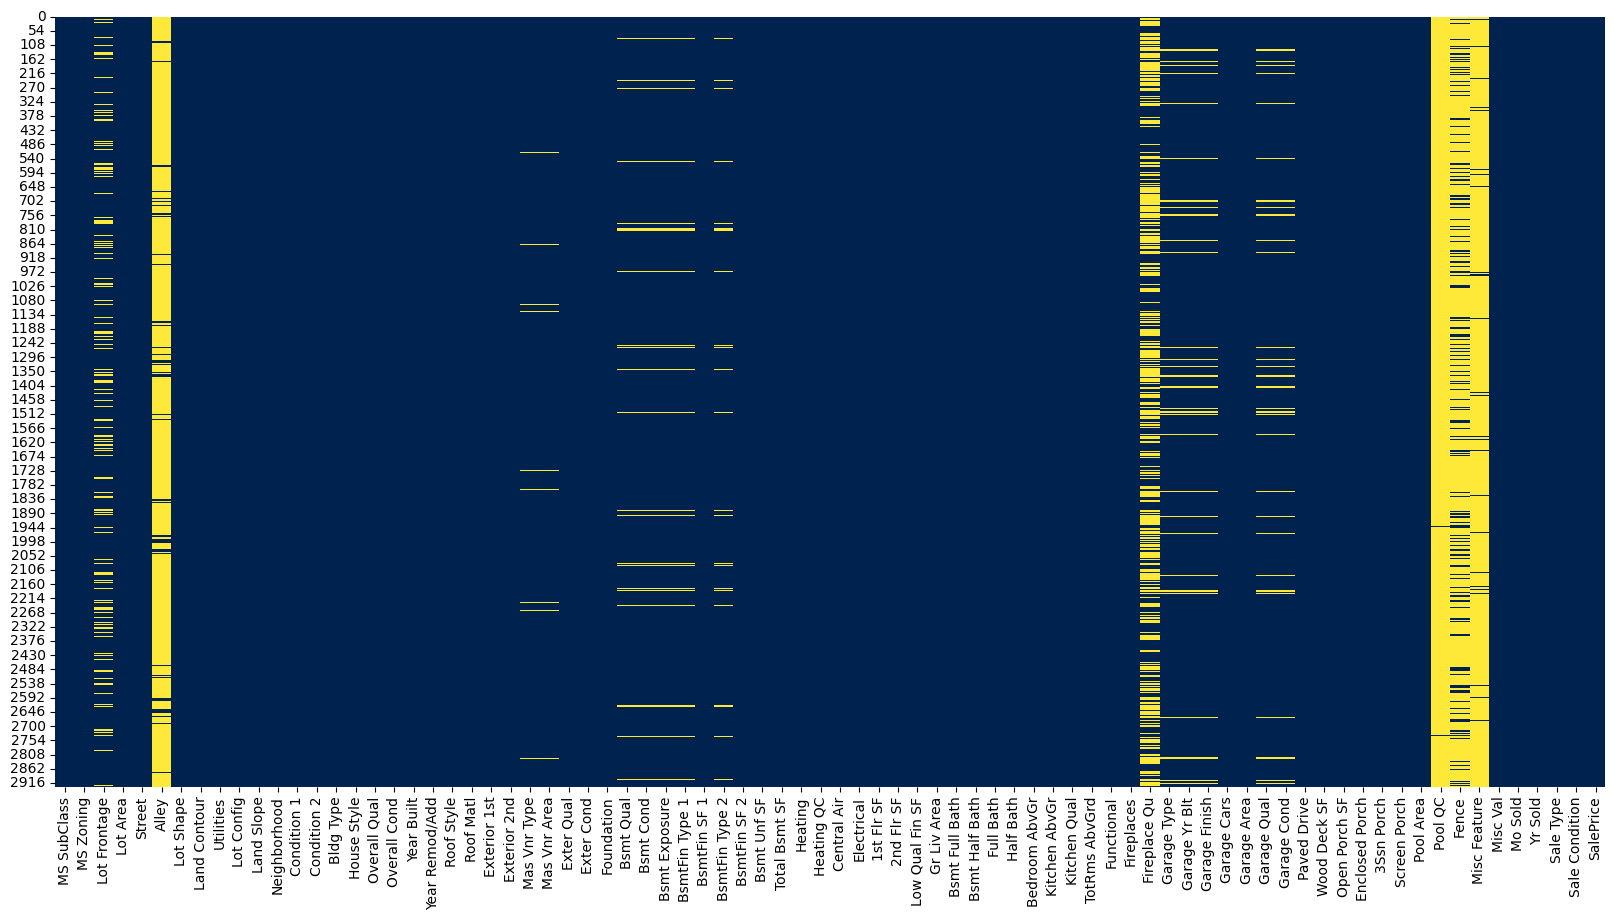

In [4]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_orig.isnull(), cbar=False, cmap='cividis')
plt.show()

Alley / Pool QC / Fence / Misc Feature contains mainly NaN values

description of the data mentions that alley / fence mean no access. Pool Qc means no pool

fireplaceQu has NaN values when fireplace is 0

Columns with numeric values: use mean in place of NaN
Columns with catergorical values: fill empty values with 


In [5]:
# Calculate the missing count and percentage for each column
missing_count = df_orig.isnull().sum()
missing_percentage = (missing_count / len(df_orig)) * 100

# Combine the results into a DataFrame
missing_data = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values,
    'Missing Percentage': missing_percentage.values
})

# Filter columns with missing values and sort by percentage in descending order
missing_data = missing_data[missing_data['Missing Count'] > 0]
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

# Display the table
print("Missing values summary:")
print(missing_data)

Missing values summary:
            Column  Missing Count  Missing Percentage
71         Pool QC           2917           99.556314
73    Misc Feature           2824           96.382253
5            Alley           2732           93.242321
72           Fence           2358           80.477816
56    Fireplace Qu           1422           48.532423
2     Lot Frontage            490           16.723549
63     Garage Cond            159            5.426621
62     Garage Qual            159            5.426621
59   Garage Finish            159            5.426621
58   Garage Yr Blt            159            5.426621
57     Garage Type            157            5.358362
31   Bsmt Exposure             83            2.832765
34  BsmtFin Type 2             81            2.764505
32  BsmtFin Type 1             80            2.730375
29       Bsmt Qual             80            2.730375
30       Bsmt Cond             80            2.730375
25    Mas Vnr Area             23            0.784983
24  

Split into numerical & catergorical tables

In [6]:
# Separate numerical and categorical columns
numerical_cols = df_orig.select_dtypes(include=['int', 'float']).columns
categorical_cols = df_orig.select_dtypes(include=['object']).columns

# Calculate missing count and percentage for numerical columns
numerical_missing_count = df_orig[numerical_cols].isnull().sum()
numerical_missing_percentage = (numerical_missing_count / len(df_orig)) * 100

numerical_missing_data = pd.DataFrame({
    'Column': numerical_missing_count.index,
    'Missing Count': numerical_missing_count.values,
    'Missing Percentage': numerical_missing_percentage.values
}).sort_values(by='Missing Percentage', ascending=False)

# Calculate missing count and percentage for categorical columns
categorical_missing_count = df_orig[categorical_cols].isnull().sum()
categorical_missing_percentage = (categorical_missing_count / len(df_orig)) * 100

categorical_missing_data = pd.DataFrame({
    'Column': categorical_missing_count.index,
    'Missing Count': categorical_missing_count.values,
    'Missing Percentage': categorical_missing_percentage.values
}).sort_values(by='Missing Percentage', ascending=False)

# Filter out rows with 0 missing count
numerical_missing_data = numerical_missing_data[numerical_missing_data['Missing Count'] > 0]
categorical_missing_data = categorical_missing_data[categorical_missing_data['Missing Count'] > 0]

# Display results
print("Numerical Columns Missing Data Summary:")
print(numerical_missing_data)

print("\nCategorical Columns Missing Data Summary:")
print(categorical_missing_data)

Numerical Columns Missing Data Summary:
            Column  Missing Count  Missing Percentage
1     Lot Frontage            490           16.723549
24   Garage Yr Blt            159            5.426621
7     Mas Vnr Area             23            0.784983
17  Bsmt Half Bath              2            0.068259
16  Bsmt Full Bath              2            0.068259
9     BsmtFin SF 2              1            0.034130
25     Garage Cars              1            0.034130
26     Garage Area              1            0.034130
10     Bsmt Unf SF              1            0.034130
11   Total Bsmt SF              1            0.034130
8     BsmtFin SF 1              1            0.034130

Categorical Columns Missing Data Summary:
            Column  Missing Count  Missing Percentage
38         Pool QC           2917           99.556314
40    Misc Feature           2824           96.382253
2            Alley           2732           93.242321
39           Fence           2358           80.477816

heatmap axis need changed to fill in missing columns. 
Label better 

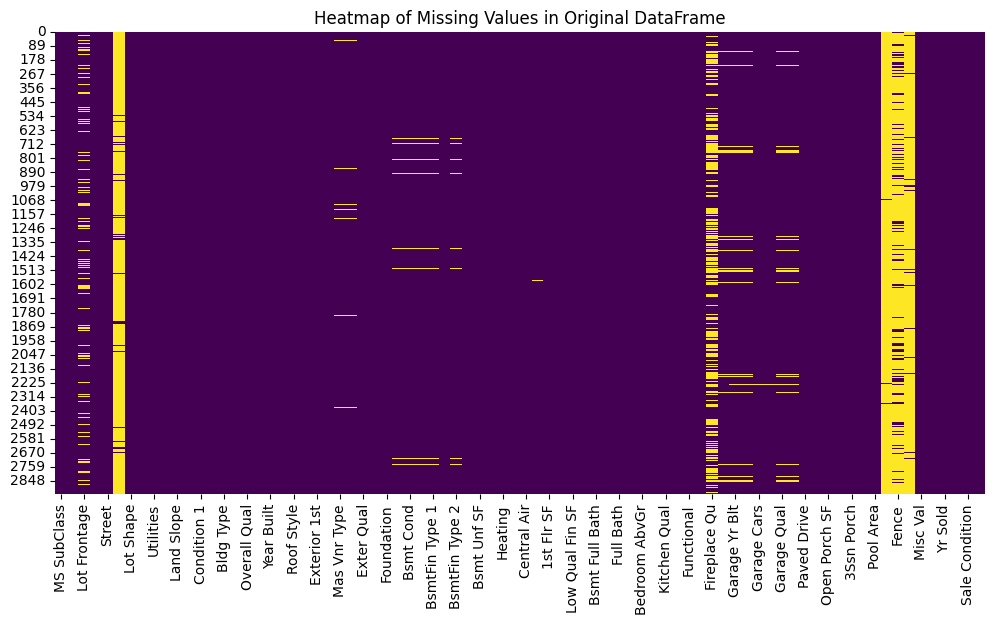

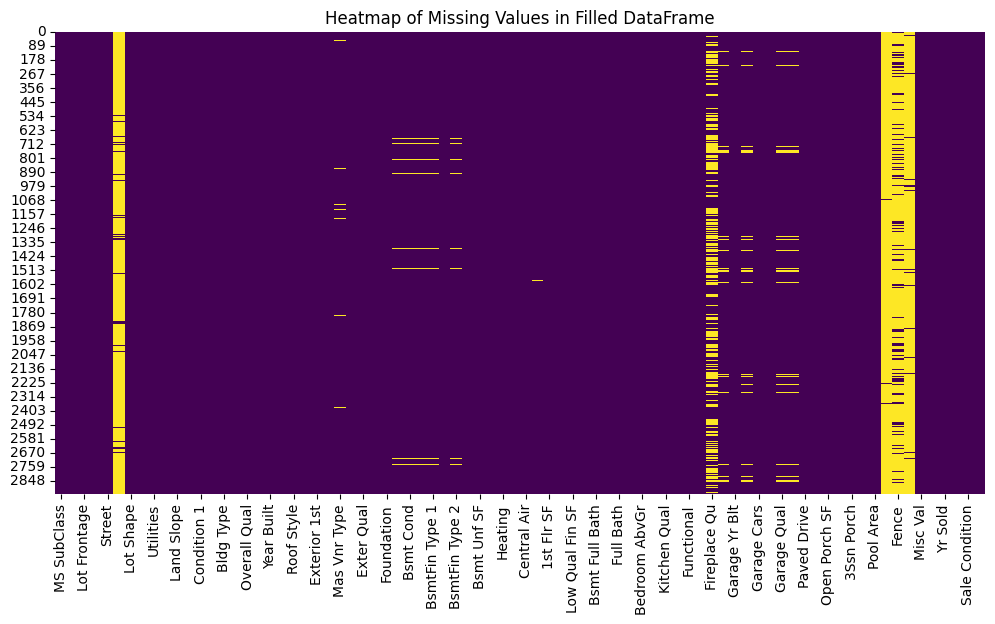

In [7]:
# Create a copy of the original DataFrame to avoid overwriting
df_num_filled = df_orig.copy()

# Fill missing values in numerical columns with their column mean
numerical_cols = df_num_filled.select_dtypes(include=['int', 'float']).columns
for col in numerical_cols:
    if df_num_filled[col].isnull().sum() > 0:  # Check if the column has missing values
        df_num_filled[col].fillna(df_num_filled[col].mean(), inplace=True)

# Heatmap for the original DataFrame (df_orig)
plt.figure(figsize=(12, 6))
sns.heatmap(df_orig.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values in Original DataFrame")
plt.show()

# Heatmap for the filled DataFrame (df_num_filled)
plt.figure(figsize=(12, 6))
sns.heatmap(df_num_filled.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values in Filled DataFrame")
plt.show()

encode for categorical columns

try label & ordinal?

In [18]:
df_cat_filled = df_num_filled.copy()

df_cat_filled['Bsmt Qual'].fillna('None', inplace=True)
df_cat_filled['Bsmt Cond'].fillna('None', inplace=True)
df_cat_filled['Bsmt Exposure'].fillna('None', inplace=True)
df_cat_filled['BsmtFin Type 1'].fillna('None', inplace=True)
df_cat_filled['BsmtFin Type 2'].fillna('None', inplace=True)
df_cat_filled['Fireplace Qu'].fillna('None', inplace=True)
df_cat_filled['Garage Finish'].fillna('None', inplace=True)
df_cat_filled['Garage Qual'].fillna('None', inplace=True)
df_cat_filled['Garage Cond'].fillna('None', inplace=True)
df_cat_filled['Pool QC'].fillna('None', inplace=True)
df_cat_filled['Fence'].fillna('None', inplace=True)
df_cat_filled.loc[df_cat_filled['Electrical'].isna(),'Electrical'] ='FuseF'

print("Unique values in 'Electrical':", df_cat_filled['Electrical'].unique())
print("Unique values in 'alley':", df_cat_filled['Alley'].unique())

Unique values in 'Electrical': ['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix']
Unique values in 'alley': [nan 'Pave' 'Grvl']


In [23]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Create a copy of the original DataFrame to avoid overwriting
df_encoded = df_cat_filled.copy()

# Separate categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Check for columns containing the 'nan' category
for col in df_encoded.columns:
    if 'nan' in df_encoded[col].astype(str).unique():
        print(f"Column '{col}' contains 'nan' as a category.")

# Define ordinal columns and their order
ordinal_columns = {
    'Pool QC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],  # mainly no pools, if PoolArea is 0
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], 
    'Fireplace Qu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
    'Garage Cond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Garage Qual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Garage Finish': ['None', 'Unf', 'RFn', 'Fin'],
    'Bsmt Exposure': ['None', 'No', 'Mn', 'Av', 'Gd'], 
    'BsmtFin Type 2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
    'BsmtFin Type 1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
    'Bsmt Qual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
    'Bsmt Cond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
    'Electrical': ['FuseP', 'FuseF', 'Mix', 'FuseA', 'SBrkr'], 
}

# Apply Ordinal Encoding for ordinal columns
for col, order in ordinal_columns.items():
    if col in categorical_cols:
        ordinal_encoder = OrdinalEncoder(categories=[order])
        df_encoded[col] = ordinal_encoder.fit_transform(df_encoded[[col]])

#'Garage Type': ['No', 'Yes'],  
#'Misc Feature': ['Bad', 'Average', 'Good', 'Excellent']    
#'Alley': ['No', 'Yes'],  
#'Mas Vnr Type': ['No', 'Yes'],  # Example ordinal column

# Apply Label Encoding for the remaining categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    if col not in ordinal_columns:  # Skip ordinal columns
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Display the transformed DataFrame
df_encoded.head()


Column 'Alley' contains 'nan' as a category.
Column 'Mas Vnr Type' contains 'nan' as a category.
Column 'Garage Type' contains 'nan' as a category.
Column 'Misc Feature' contains 'nan' as a category.


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,5,141.0,31770,1,2,0,3,0,0,0,15,2,2,0,2,6,5,1960,1960,3,1,3,10,4,112.0,3,4,1,3.0,4.0,4.0,4.0,639.0,1.0,0.0,441.0,1080.0,1,1,1,4.0,1656,0,0,1656,1.0,0.0,1,0,3,1,4,7,7,2,4.0,1,1960.0,3.0,2.0,528.0,3.0,3.0,1,210,62,0,0,0,0,0.0,0.0,5,0,5,2010,9,4,215000
1,20,4,80.0,11622,1,2,3,3,0,4,0,15,1,2,0,2,5,6,1961,1961,1,1,13,14,3,0.0,3,4,1,3.0,3.0,1.0,3.0,468.0,2.0,144.0,270.0,882.0,1,4,1,4.0,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,0.0,1,1961.0,1.0,1.0,730.0,3.0,3.0,2,140,0,0,0,120,0,0.0,3.0,5,0,6,2010,9,4,105000
2,20,5,81.0,14267,1,2,0,3,0,0,0,15,2,2,0,2,6,6,1958,1958,3,1,14,15,1,108.0,3,4,1,3.0,3.0,1.0,5.0,923.0,1.0,0.0,406.0,1329.0,1,4,1,4.0,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,7,0,0.0,1,1958.0,1.0,1.0,312.0,3.0,3.0,2,393,36,0,0,0,0,0.0,0.0,1,12500,6,2010,9,4,172000
3,20,5,93.0,11160,1,2,3,3,0,0,0,15,2,2,0,2,7,5,1968,1968,3,1,3,3,3,0.0,2,4,1,3.0,3.0,1.0,5.0,1065.0,1.0,0.0,1045.0,2110.0,1,0,1,4.0,2110,0,0,2110,1.0,0.0,2,1,3,1,0,8,7,2,3.0,1,1968.0,3.0,2.0,522.0,3.0,3.0,2,0,0,0,0,0,0,0.0,0.0,5,0,4,2010,9,4,244000
4,60,5,74.0,13830,1,2,0,3,0,4,0,8,2,2,0,5,5,5,1997,1998,1,1,13,14,3,0.0,3,4,2,4.0,3.0,1.0,6.0,791.0,1.0,0.0,137.0,928.0,1,2,1,4.0,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,3.0,1,1997.0,3.0,2.0,482.0,3.0,3.0,2,212,34,0,0,0,0,0.0,3.0,5,0,3,2010,9,4,189900


#Feature

define target for our dataset

In [30]:
y = df_encoded['SalePrice']
X = df_encoded.drop(columns=['SalePrice'])

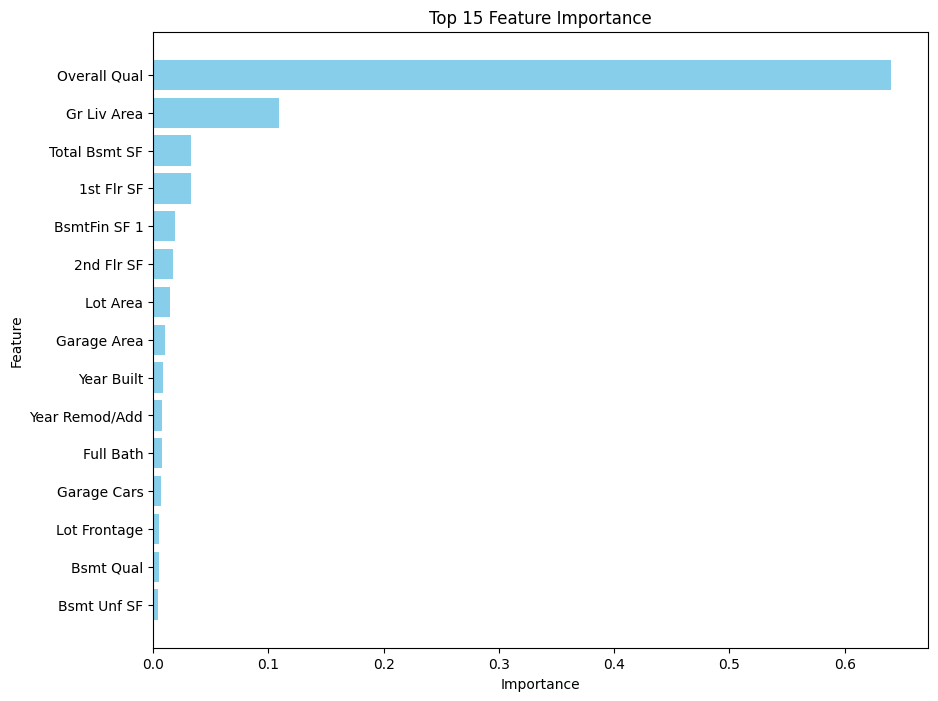

In [34]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)


# Get feature importance
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_15_features = importance_df.head(15)

# Plot feature importance for the top 15 features
plt.figure(figsize=(10, 8))
plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [43]:
!pip install --upgrade numpy

import numpy as np
print(np.__version__)

  Using cached numpy-2.2.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-macosx_10_9_x86_64.whl (21.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.4 which is incompatible.
1.23.5


In [45]:
import shap

# Train a model (e.g., Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X)

ImportError: Numba needs NumPy 1.24 or greater. Got NumPy 1.23.